## Import libraries

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## import dataset

In [108]:
df_titanic = pd.read_csv('Titanic.tsv', sep = '\t')

In [109]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  894 non-null    int64  
 1   Survived     894 non-null    int64  
 2   Pclass       894 non-null    float64
 3   Name         894 non-null    object 
 4   Sex          894 non-null    object 
 5   Age          721 non-null    object 
 6   SibSp        894 non-null    int64  
 7   Parch        894 non-null    object 
 8   Ticket       893 non-null    object 
 9   Fare         893 non-null    object 
 10  Cabin        208 non-null    object 
 11  Embarked     892 non-null    object 
 12  ship         894 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 90.9+ KB


In [110]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C,Titanic
890,891,0,3.0,"Dooley, Mr. Patrick",male,32,0,0,370376,"7,75",NaN,Q,Titanic
891,1000,1,1.0,Mr. Frederick Maxfield Hoyt,male,38,1,0,19943,90,C93,S,Titanic
892,1143,1,3.0,"Sandstrom, Miss. Marguerite Ru&5$$",female,4,1,1,PP 9549,"16,7",G6,S,Titanic
893,-12,0,3.0,"Vestrom, Miss. Hulda Amanda Adolfina",female,.7,0,0,350406,"7,8542",NaN,S,Titanic


## Find duplicates

In [111]:
df_titanic['PassengerId'].duplicated().sum()

4

In [112]:
df_titanic[df_titanic['PassengerId'].duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
13,11,1,3.0,"Sandstrom, Miss. Marguerite Ru&5$$",female,4,1,1,PP 9549,"16,7",G6,S,Titanic
23,11,1,3.0,"Sandstrom, Miss. Marguerite Ru&5$$",female,4,1,1,PP 9549,"16,7",G6,S,Titanic
520,225,1,1.0,"Hoyt, Mr. Frederick Maxfield",male,38,1,0,19943,90,C93,S,Titanic
678,225,1,1.0,"Hoytt, Mr. Frederick Maxfield",male,38,1,0,19943,90,C93,S,Titanic


we found the duplicates, thus we need to remove the duplicates.

In [113]:
df_titanic = df_titanic.drop_duplicates(subset=['PassengerId'], keep='first')


In [114]:
df_titanic['PassengerId'].duplicated().sum()

0

In [115]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    float64
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          717 non-null    object 
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    object 
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     888 non-null    object 
 12  ship         890 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 97.3+ KB


## repairing the dataset (manipulate the value) and change the data type

There are inconsistent values in the some columns. Hence, we need to change them to proper values.

### PassengerId

I will change the data type of PassengerId because we won't do aggregation to this column

In [116]:
#change the data type

df_titanic['PassengerId'] = df_titanic['PassengerId'].astype(str)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    object 
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    float64
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          717 non-null    object 
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    object 
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     888 non-null    object 
 12  ship         890 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 97.3+ KB


In [117]:
df_titanic['PassengerId'].value_counts()

1      1
601    1
590    1
591    1
592    1
      ..
303    1
304    1
305    1
306    1
-12    1
Name: PassengerId, Length: 890, dtype: int64

### Name

In [118]:
df_titanic['Name'].value_counts()

Sandstrom, Miss. Marguerite Ru&5$$                     2
Vestrom, Miss. Hulda Amanda Adolfina                   2
Braund, Mr. Owen Harris                                1
Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)    1
Murdlin, Mr. Joseph                                    1
                                                      ..
Johnson, Mr. William Cahoone Jr                        1
Keane, Miss. Nora A                                    1
Williams, Mr. Howard Hugh "Harry"                      1
Allison, Master. Hudson Trevor                         1
Mr. Frederick Maxfield Hoyt                            1
Name: Name, Length: 888, dtype: int64

In [119]:
df_titanic['Name'].duplicated().sum()

2

In [120]:
df_titanic[df_titanic['Name'].duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
892,1143,1,3.0,"Sandstrom, Miss. Marguerite Ru&5$$",female,4,1,1,PP 9549,"16,7",G6,S,Titanic
893,-12,0,3.0,"Vestrom, Miss. Hulda Amanda Adolfina",female,.7,0,0,350406,"7,8542",NaN,S,Titanic


In [121]:
df_titanic = df_titanic.drop_duplicates(subset=['Name'], keep='first')
df_titanic['Name'].value_counts()

Braund, Mr. Owen Harris                         1
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")    1
Gilinski, Mr. Eliezer                           1
Murdlin, Mr. Joseph                             1
Rintamaki, Mr. Matti                            1
                                               ..
McCoy, Mr. Bernard                              1
Johnson, Mr. William Cahoone Jr                 1
Keane, Miss. Nora A                             1
Williams, Mr. Howard Hugh "Harry"               1
Mr. Frederick Maxfield Hoyt                     1
Name: Name, Length: 888, dtype: int64

In [122]:
df_titanic['Name'].duplicated().sum()

0

In [123]:
df_titanic['Name'] = df_titanic['Name'].replace('Mr. Frederick Maxfield Hoyt','Hoyt, Mr. Frederick Maxfield')

In [124]:
df_titanic['FirstName'] = df_titanic['Name'].str.split(',').str[1]
df_titanic['LastName'] = df_titanic['Name'].str.split(',').str[0]
df_titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship,FirstName,LastName
887,888,1,1.0,"Graham, Miss. Margaret Edith",F,19,0,0,112053,30,B42,S,Titanic,Miss. Margaret Edith,Graham
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,"23,45",NaN,S,Titanic,"Miss. Catherine Helen ""Carrie""",Johnston
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C,Titanic,Mr. Karl Howell,Behr
890,891,0,3.0,"Dooley, Mr. Patrick",male,32,0,0,370376,"7,75",NaN,Q,Titanic,Mr. Patrick,Dooley
891,1000,1,1.0,"Hoyt, Mr. Frederick Maxfield",male,38,1,0,19943,90,C93,S,Titanic,Mr. Frederick Maxfield,Hoyt


In [125]:
df_titanic['FirstName'].value_counts()

 Mr. James                                                       7
 Mr. John                                                        7
 Miss. Mary                                                      6
 Mr. William                                                     6
 Mr. Ivan                                                        4
                                                                ..
 Master. Hudson Trevor                                           1
 Miss. Margaret                                                  1
 Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)    1
 Miss. Laura Mabel                                               1
 Mr. Karl Howell                                                 1
Name: FirstName, Length: 799, dtype: int64

In [126]:
df_titanic['FirstName'] = df_titanic['FirstName'].str.split('.').str[1]
df_titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship,FirstName,LastName
887,888,1,1.0,"Graham, Miss. Margaret Edith",F,19,0,0,112053,30,B42,S,Titanic,Margaret Edith,Graham
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,"23,45",NaN,S,Titanic,"Catherine Helen ""Carrie""",Johnston
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C,Titanic,Karl Howell,Behr
890,891,0,3.0,"Dooley, Mr. Patrick",male,32,0,0,370376,"7,75",NaN,Q,Titanic,Patrick,Dooley
891,1000,1,1.0,"Hoyt, Mr. Frederick Maxfield",male,38,1,0,19943,90,C93,S,Titanic,Frederick Maxfield,Hoyt


In [127]:
df_titanic = df_titanic[["PassengerId","Survived","Pclass","FirstName","LastName","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked","ship"]]
df_titanic.tail()

,PassengerId,Survived,Pclass,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
887,888,1,1.0,Margaret Edith,Graham,F,19,0,0,112053,30,B42,S,Titanic
888,889,0,3.0,"Catherine Helen ""Carrie""",Johnston,female,NaN,1,2,W./C. 6607,"23,45",NaN,S,Titanic
889,890,1,1.0,Karl Howell,Behr,male,26,0,0,111369,30,C148,C,Titanic
890,891,0,3.0,Patrick,Dooley,male,32,0,0,370376,"7,75",NaN,Q,Titanic
891,1000,1,1.0,Frederick Maxfield,Hoyt,male,38,1,0,19943,90,C93,S,Titanic


### Survived

In [128]:
df_titanic["Survived"].value_counts()

 0    547
 1    340
-4      1
Name: Survived, dtype: int64

In [129]:
df_titanic["Survived"].mode()

0    0
Name: Survived, dtype: int64

We will change -4 to 0 because 0 is the nearest value to -4 and also the most frequent values.

In [130]:
df_titanic['Survived'] = df_titanic['Survived'].replace(-4, 0)
df_titanic['Survived'].value_counts()

0    548
1    340
Name: Survived, dtype: int64

### Sex

In [131]:
df_titanic["Sex"].value_counts()

male       573
female     306
fem          2
malef        1
mal          1
femmale      1
feemale      1
Female       1
malee        1
F            1
Name: Sex, dtype: int64

As we can see, there are inconsistency in the column of gender. In this column we will change it to only two labels. Female and Male.

In [132]:
#change the label

# male
df_titanic['Sex'] = df_titanic['Sex'].replace(['malef', 'mal', 'malee', 'male'], 'Male')

# female
df_titanic['Sex'] = df_titanic['Sex'].replace(['fem', 'femmale', 'feemale', 'Female','F', 'female'], 'Female')

df_titanic['Sex'].value_counts()

Male      576
Female    312
Name: Sex, dtype: int64

### Age

There are some values of age that has comma and are not even numbers, so we will change it to period and even numbers.

In [133]:
df_titanic['Age'].value_counts()

24      30
22      27
18      26
19      25
30      24
        ..
36,5     1
55,5     1
0,92     1
23,5     1
74       1
Name: Age, Length: 93, dtype: int64

In [134]:
# find the age with decimal

df_titanic[df_titanic['Age'].str.find(',') > -1]

,PassengerId,Survived,Pclass,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
57,58,0,3.0,Mansouer,Novel,Male,"28,5",0,0,2697,"7,2292",NaN,C,Titanic
78,79,1,2.0,Alden Gates,Caldwell,Male,"0,83",0,2,248738,29,NaN,S,Titanic
111,112,0,3.0,Hileni,Zabour,Female,"14,5",1,0,2665,"14,4542",NaN,C,Titanic
116,117,0,3.0,Patrick,Connors,Male,"70,5",0,0,370369,"7,75",NaN,Q,Titanic
122,123,0,2.0,Nicholas,Nasser,Male,"32,5",1,0,237736,"30,0708",NaN,C,Titanic
123,124,1,2.0,Susan,Webber,Female,"32,5",0,0,27267,13,E101,S,Titanic
148,149,0,2.0,"Michel (""Louis M Hoffman"")",Navratil,Male,"36,5",0,2,230080,26,F2,S,Titanic
152,153,0,3.0,Alfonzo,Meo,Male,"55,5",0,0,A.5. 11206,"8,05",NaN,S,Titanic
153,154,0,3.0,Austin Blyler,van Billiard,Male,"40,5",0,2,A/5. 851,"14,5",NaN,S,Titanic
203,204,0,3.0,Gerious,Youseff,Male,"45,5",0,0,2628,"7,225",NaN,C,Titanic


In [135]:
# change the comma into period, and minus values to positive values

df_titanic['Age'] = df_titanic['Age'].str.replace(',','.')
#df_titanic['Age'] = df_titanic['Age'].str.replace('-3','3')
#df_titanic['Age'] = df_titanic['Age'].str.replace('-12','12')
#df_titanic['Age'] = df_titanic['Age'].str.replace('4435',np.NaN)
df_titanic.tail()

,PassengerId,Survived,Pclass,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
887,888,1,1.0,Margaret Edith,Graham,Female,19,0,0,112053,30,B42,S,Titanic
888,889,0,3.0,"Catherine Helen ""Carrie""",Johnston,Female,NaN,1,2,W./C. 6607,"23,45",NaN,S,Titanic
889,890,1,1.0,Karl Howell,Behr,Male,26,0,0,111369,30,C148,C,Titanic
890,891,0,3.0,Patrick,Dooley,Male,32,0,0,370376,"7,75",NaN,Q,Titanic
891,1000,1,1.0,Frederick Maxfield,Hoyt,Male,38,1,0,19943,90,C93,S,Titanic


In [136]:
#Change the data type 

#Age
df_titanic['Age'] = df_titanic['Age'].astype(float)

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    object 
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    float64
 3   FirstName    888 non-null    object 
 4   LastName     888 non-null    object 
 5   Sex          888 non-null    object 
 6   Age          715 non-null    float64
 7   SibSp        888 non-null    int64  
 8   Parch        888 non-null    object 
 9   Ticket       887 non-null    object 
 10  Fare         887 non-null    object 
 11  Cabin        203 non-null    object 
 12  Embarked     886 non-null    object 
 13  ship         888 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 104.1+ KB


In [137]:
# round the numbers of age

df_titanic['Age'] = np.round(df_titanic['Age'])
df_titanic.tail(5)

,PassengerId,Survived,Pclass,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
887,888,1,1.0,Margaret Edith,Graham,Female,19.0,0,0,112053,30,B42,S,Titanic
888,889,0,3.0,"Catherine Helen ""Carrie""",Johnston,Female,NaN,1,2,W./C. 6607,"23,45",NaN,S,Titanic
889,890,1,1.0,Karl Howell,Behr,Male,26.0,0,0,111369,30,C148,C,Titanic
890,891,0,3.0,Patrick,Dooley,Male,32.0,0,0,370376,"7,75",NaN,Q,Titanic
891,1000,1,1.0,Frederick Maxfield,Hoyt,Male,38.0,1,0,19943,90,C93,S,Titanic


### Pclass

In [138]:
df_titanic['Pclass'].value_counts()

 3.0    489
 1.0    214
 2.0    184
-2.0      1
Name: Pclass, dtype: int64

There is a value that does not match with other values, probably it is a typo. Thus, we need to change it to proper value.

In [139]:
df_titanic['Pclass'] = df_titanic['Pclass'].replace(-2,2)
df_titanic['Pclass'].value_counts()

3.0    489
1.0    214
2.0    185
Name: Pclass, dtype: int64

In [140]:
#change the data type

df_titanic['Pclass'] = df_titanic['Pclass'].astype(int)

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    object 
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   FirstName    888 non-null    object 
 4   LastName     888 non-null    object 
 5   Sex          888 non-null    object 
 6   Age          715 non-null    float64
 7   SibSp        888 non-null    int64  
 8   Parch        888 non-null    object 
 9   Ticket       887 non-null    object 
 10  Fare         887 non-null    object 
 11  Cabin        203 non-null    object 
 12  Embarked     886 non-null    object 
 13  ship         888 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 104.1+ KB


### Parch

In [141]:
df_titanic['Parch'].value_counts()

0     676
1     118
2      80
3       5
5       4
4       4
no      1
Name: Parch, dtype: int64

In [142]:
df_titanic[df_titanic['Parch'].str.contains('no')]


,PassengerId,Survived,Pclass,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
376,377,1,3,Aurora Adelia,Landergren,Female,22.0,0,no,C 7077,"7,25",NaN,S,Titanic


There is a inconsistent value in Parch column, so we need to change it. this time we will change it to the NaN value and it will be executed later when handling missing values.

In [143]:
#changing the value "no" with mode 

df_titanic['Parch'] = df_titanic['Parch'].replace('no', np.NaN)

df_titanic['Parch'].value_counts()

0    676
1    118
2     80
3      5
5      4
4      4
Name: Parch, dtype: int64

In [144]:
#change the data type

df_titanic['Parch'] = df_titanic['Parch'].astype(float)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    object 
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   FirstName    888 non-null    object 
 4   LastName     888 non-null    object 
 5   Sex          888 non-null    object 
 6   Age          715 non-null    float64
 7   SibSp        888 non-null    int64  
 8   Parch        887 non-null    float64
 9   Ticket       887 non-null    object 
 10  Fare         887 non-null    object 
 11  Cabin        203 non-null    object 
 12  Embarked     886 non-null    object 
 13  ship         888 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 104.1+ KB


### Fare

In [145]:
df_titanic[df_titanic['Fare'].str.find('a') > -1]

,PassengerId,Survived,Pclass,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
363,364,0,3,Adola,Asim,Male,35.0,0,0.0,SOTON/O.Q. 3101310,07.maj,NaN,S,Titanic


We will change the inconsitent value with NaN value.

In [146]:
df_titanic['Fare'] = df_titanic['Fare'].str.replace(',','.')
df_titanic['Fare'] = df_titanic['Fare'].replace('07.maj', np.NaN)

In [147]:
#change the data type and round the numbers

df_titanic['Fare'] = df_titanic['Fare'].astype(float)
df_titanic['Fare'] = np.round(df_titanic['Fare'],2)
df_titanic.tail(5)

,PassengerId,Survived,Pclass,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
887,888,1,1,Margaret Edith,Graham,Female,19.0,0,0.0,112053,30.00,B42,S,Titanic
888,889,0,3,"Catherine Helen ""Carrie""",Johnston,Female,NaN,1,2.0,W./C. 6607,23.45,NaN,S,Titanic
889,890,1,1,Karl Howell,Behr,Male,26.0,0,0.0,111369,30.00,C148,C,Titanic
890,891,0,3,Patrick,Dooley,Male,32.0,0,0.0,370376,7.75,NaN,Q,Titanic
891,1000,1,1,Frederick Maxfield,Hoyt,Male,38.0,1,0.0,19943,90.00,C93,S,Titanic


### Embarked

In [148]:
df_titanic['Embarked'].value_counts()

S     639
C     167
Q      76
So      2
Co      1
Qe      1
Name: Embarked, dtype: int64

We will change the value "So","Co","Qe" to "S","Q","C".

In [149]:
#change the label

# "So"
df_titanic['Embarked'] = df_titanic['Embarked'].replace('So','S')

# "Co"
df_titanic['Embarked'] = df_titanic['Embarked'].replace('Co','C')

# "Qe"
df_titanic['Embarked'] = df_titanic['Embarked'].replace('Qe','Q')

df_titanic['Embarked'].value_counts()

S    641
C    168
Q     77
Name: Embarked, dtype: int64

### Ship


In [150]:
df_titanic['ship'].value_counts()

Titanic    886
Titani       1
Titnic       1
Name: ship, dtype: int64

In [151]:
#Change the inconsistent values 

df_titanic['ship'] = df_titanic['ship'].replace(['Titani','Titnic'],'Titanic')
df_titanic['ship'].value_counts()

Titanic    888
Name: ship, dtype: int64

In [152]:
#Change the column name into Title
df_titanic.rename(columns = {'ship':'Ship'}, inplace = True)
df_titanic.head(1)

,PassengerId,Survived,Pclass,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ship
0,1,0,3,Owen Harris,Braund,Male,22.0,1,0.0,A/5 21171,7.25,NaN,S,Titanic


## Handling missing values

In [153]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
FirstName        0
LastName         0
Sex              0
Age            173
SibSp            0
Parch            1
Ticket           1
Fare             2
Cabin          685
Embarked         2
Ship             0
dtype: int64

In [154]:
df_titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
FirstName      0.000000
LastName       0.000000
Sex            0.000000
Age            0.194820
SibSp          0.000000
Parch          0.001126
Ticket         0.001126
Fare           0.002252
Cabin          0.771396
Embarked       0.002252
Ship           0.000000
dtype: float64

We can see that age, ticket, fare, cabin and embarked columns have missing values. 

### Age column

we will fill the missing values with median value of age. 

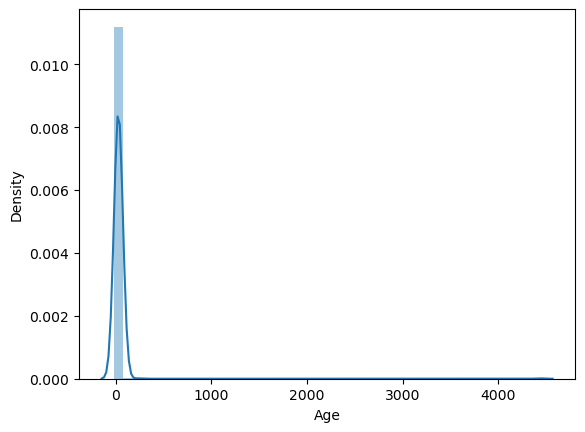

In [155]:
sns.distplot(df_titanic.Age)
plt.show()

In [156]:
df_titanic['Age'].median()

28.0

In [157]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())
df_titanic.isna().sum()

#df['rating'] = df['rating'].fillna(df['rating'].median())

PassengerId      0
Survived         0
Pclass           0
FirstName        0
LastName         0
Sex              0
Age              0
SibSp            0
Parch            1
Ticket           1
Fare             2
Cabin          685
Embarked         2
Ship             0
dtype: int64

### Parch column

we will fill the missing values with median values.

In [158]:
df_titanic['Parch'].value_counts()

0.0    676
1.0    118
2.0     80
3.0      5
5.0      4
4.0      4
Name: Parch, dtype: int64

In [159]:
df_titanic['Parch'].isna().sum()

1

In [160]:
df_titanic['Parch'] = df_titanic['Parch'].fillna(df_titanic['Parch'].median())
df_titanic['Parch'].isna().sum()

0

### Ticket column


In [161]:
df_titanic['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      6
3101295     6
347088      6
           ..
226593      1
9234        1
19988       1
2693        1
370376      1
Name: Ticket, Length: 680, dtype: int64

we will fill the missing value in ticket column with most frequent value.

In [162]:
df_titanic['Ticket'].mode()

0        1601
1    CA. 2343
Name: Ticket, dtype: object

In [163]:
df_titanic['Ticket'].fillna(df_titanic['Ticket'].mode()[0], inplace = True)
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
FirstName        0
LastName         0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             2
Cabin          685
Embarked         2
Ship             0
dtype: int64

In [164]:
df_titanic['Fare'].value_counts()

8.05     43
13.00    42
7.90     38
7.75     34
26.00    31
         ..
12.65     1
7.31      1
12.00     1
61.38     1
10.52     1
Name: Fare, Length: 237, dtype: int64

### Fare Column

we will fill the fare column with median value because it looks like the data is right skewed. Thus, it is better to use median.

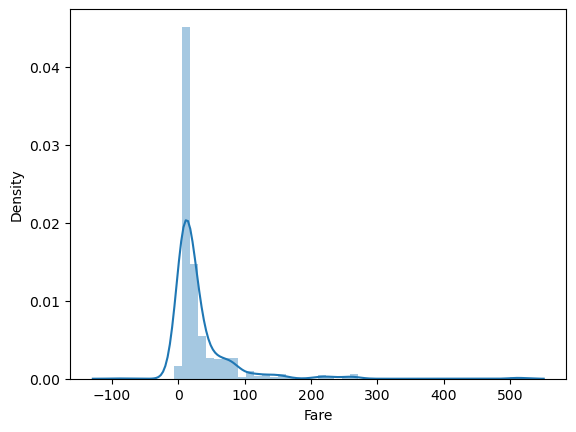

In [165]:
sns.distplot(df_titanic.Fare)
plt.show()

In [166]:
df_titanic['Fare'] = df_titanic['Fare'].fillna(df_titanic['Fare'].median())
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
FirstName        0
LastName         0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
Ship             0
dtype: int64

### Cabin Column

In [167]:
df_titanic['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

Since it is categorical value, we will change the missing values with the most frequent values.

In [168]:
df_titanic['Cabin'].fillna(df_titanic['Cabin'].mode()[0], inplace = True)
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
FirstName      0
LastName       0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Ship           0
dtype: int64

### Embarked Column

In [169]:
df_titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

we will change the missing values with the most frequent values.

In [170]:
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace = True)
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
FirstName      0
LastName       0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Ship           0
dtype: int64

## Handling outlier

In [171]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.382883,2.309685,34.447072,0.602477,0.370495,31.985203
std,0.486364,0.834594,148.610693,2.579661,0.769418,49.897705
min,0.000000,1.000000,-12.000000,0.000000,0.000000,-90.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.900000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.450000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.700000
max,1.000000,3.000000,4435.000000,70.000000,5.000000,512.330000


We will handle the outlier of those six columns above.

### Survived

In [172]:
df_titanic['Survived'].describe()

count    888.000000
mean       0.382883
std        0.486364
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [173]:
df_titanic["Survived"].value_counts()

0    548
1    340
Name: Survived, dtype: int64

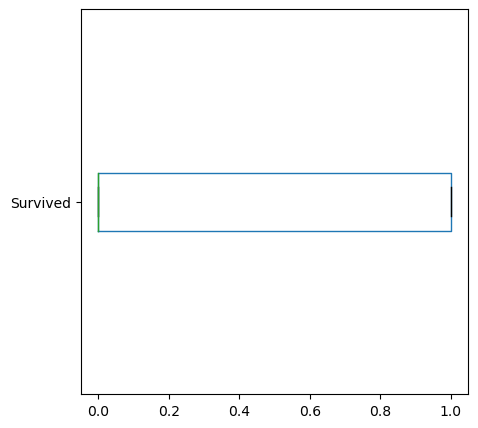

In [174]:
df_titanic.boxplot(column=['Survived'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)
plt.show()

There is no outlier in the survived column.

### Pclass

In [175]:
df_titanic['Pclass'].describe()

count    888.000000
mean       2.309685
std        0.834594
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

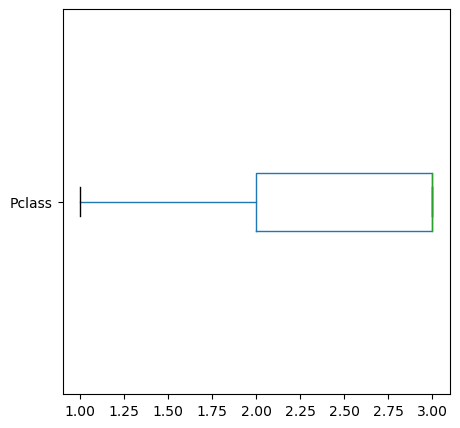

In [176]:
df_titanic.boxplot(column=['Pclass'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)
plt.show()

There is no outlier in Pclass column.

### Age

In [177]:
df_titanic['Age'].describe()

count     888.000000
mean       34.447072
std       148.610693
min       -12.000000
25%        22.000000
50%        28.000000
75%        35.000000
max      4435.000000
Name: Age, dtype: float64

In [178]:
df_titanic['Age'].value_counts()

 28.0      199
 24.0       32
 22.0       27
 30.0       26
 18.0       26
          ... 
-12.0        1
-3.0         1
 4435.0      1
 12.0        1
 74.0        1
Name: Age, Length: 75, dtype: int64

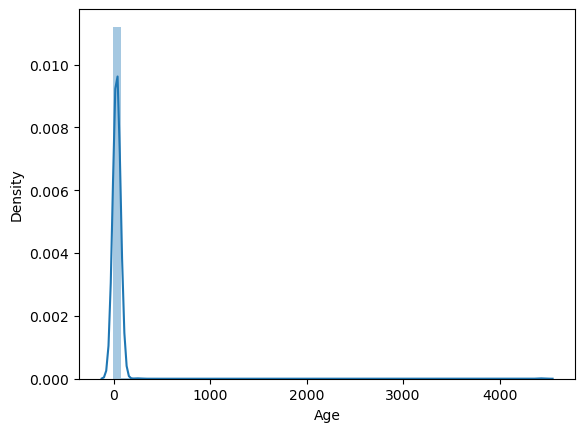

In [179]:
sns.distplot(df_titanic.Age)
plt.show()

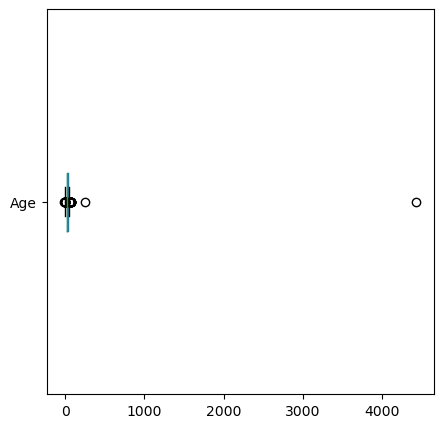

In [180]:
df_titanic.boxplot(column=['Age'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)
plt.show()

In [181]:
# quartile 1 and 3
Q1 = df_titanic['Age'].quantile(0.25)
Q3 = df_titanic['Age'].quantile(0.75)

#IQR
IQR = Q3 - Q1
min_age = Q1 - 1.5 * IQR
max_age = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_age)
print('\nMax:\n',max_age)

Q1:
 22.0

Q3:
 35.0

IQR:
 13.0

Min:
 2.5

Max:
 54.5


In [182]:
#another way to detect outliers

outliers = []
def detect_outliers_iqr(data):
    data = sorted(df_titanic['Age'])
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers  #Driver code
sample_outliers = detect_outliers_iqr(df_titanic['Age'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [-12.0, -3.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 55.0, 55.0, 56.0, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.0, 71.0, 71.0, 74.0, 80.0, 250.0, 4435.0]


As we can see there are some outliers, to handle the outliers of this column, we will replace the outliers with median values.

<AxesSubplot:>

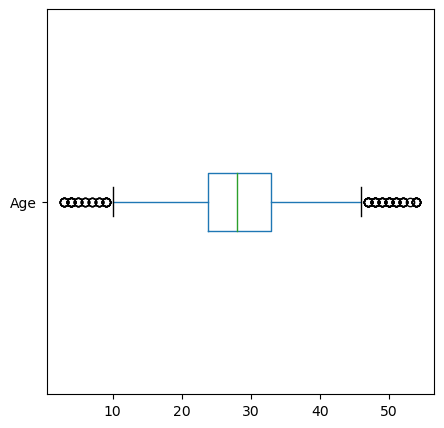

In [183]:
median = float(df_titanic['Age'].median())

df_titanic['Age'] = np.where(df_titanic['Age'] <2.5, median, df_titanic['Age'])
df_titanic['Age'] = np.where(df_titanic['Age'] >54.5, median, df_titanic['Age'])
df_titanic.boxplot(column=['Age'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)


<AxesSubplot:xlabel='Age', ylabel='Density'>

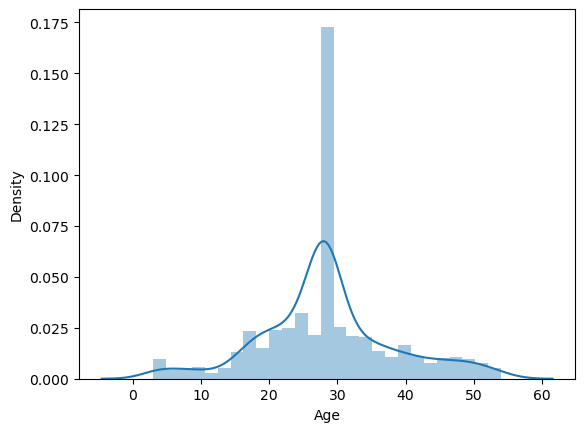

In [184]:
sns.distplot(df_titanic.Age)

### SibSp

In [185]:
df_titanic['SibSp'].describe()

count    888.000000
mean       0.602477
std        2.579661
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       70.000000
Name: SibSp, dtype: float64

In [186]:
df_titanic['SibSp'].value_counts()

0     605
1     208
2      28
4      18
3      16
8       7
5       5
70      1
Name: SibSp, dtype: int64

<AxesSubplot:>

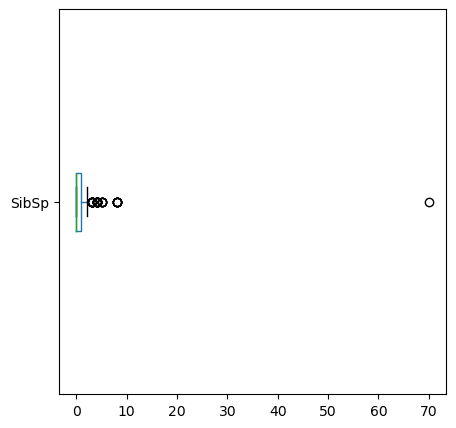

In [187]:
df_titanic.boxplot(column=['SibSp'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

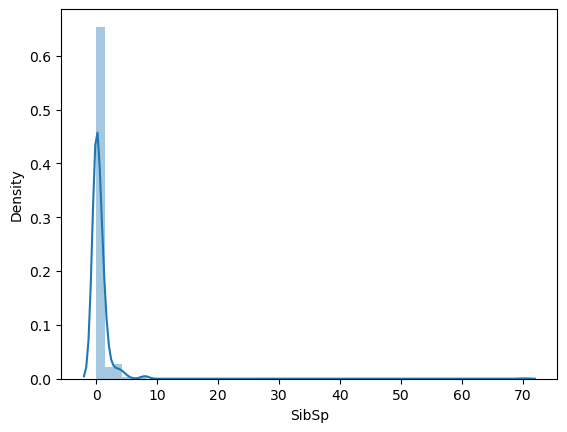

In [188]:
sns.distplot(df_titanic.SibSp)

It looks like the data is skewed, thus we are going to handle the outliers with median as well.

In [189]:
# quartile 1 and 3
Q1 = df_titanic['SibSp'].quantile(0.25)
Q3 = df_titanic['SibSp'].quantile(0.75)

#IQR
IQR = Q3 - Q1
min_sibsp = Q1 - 1.5 * IQR
max_sibsp = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_sibsp)
print('\nMax:\n',max_sibsp)

Q1:
 0.0

Q3:
 1.0

IQR:
 1.0

Min:
 -1.5

Max:
 2.5


<AxesSubplot:>

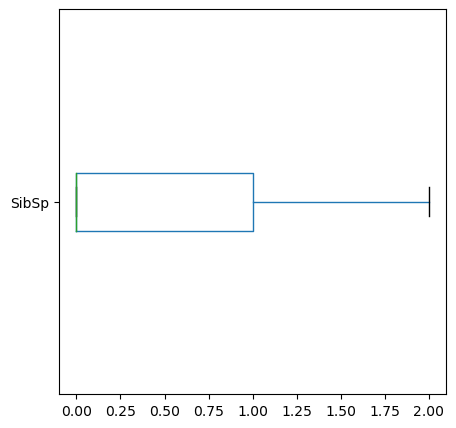

In [190]:
median_sibsp = float(df_titanic['SibSp'].median())

df_titanic['SibSp'] = np.where(df_titanic['SibSp'] <-1.5, median_sibsp, df_titanic['SibSp'])
df_titanic['SibSp'] = np.where(df_titanic['SibSp'] >2.5, median_sibsp, df_titanic['SibSp'])
df_titanic.boxplot(column=['SibSp'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

In [191]:
df_titanic['SibSp'].value_counts()

0.0    652
1.0    208
2.0     28
Name: SibSp, dtype: int64

### Parch

In [192]:
df_titanic['Parch'].describe()

count    888.000000
mean       0.370495
std        0.769418
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: Parch, dtype: float64

In [193]:
df_titanic['Parch'].value_counts()

0.0    677
1.0    118
2.0     80
3.0      5
5.0      4
4.0      4
Name: Parch, dtype: int64

<AxesSubplot:>

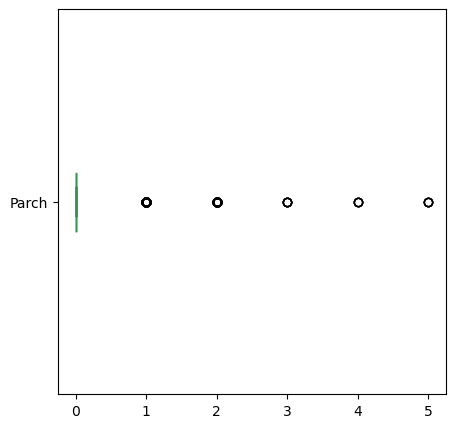

In [194]:
df_titanic.boxplot(column=['Parch'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

<AxesSubplot:xlabel='Parch', ylabel='Density'>

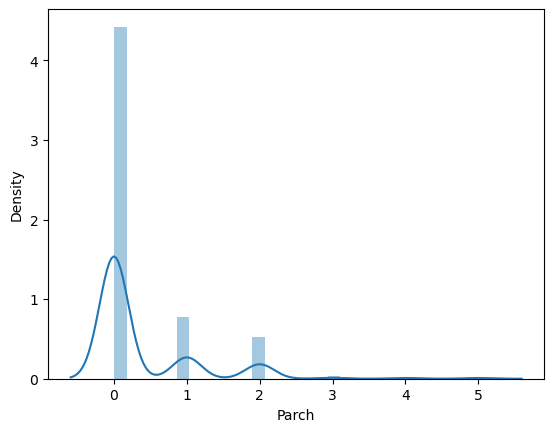

In [195]:
sns.distplot(df_titanic.Parch)

In [196]:
# quartile 1 and 3
Q1 = df_titanic['Parch'].quantile(0.25)
Q3 = df_titanic['Parch'].quantile(0.75)

#IQR
IQR = Q3 - Q1
min_parch = Q1 - 1.5 * IQR
max_parch = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_parch)
print('\nMax:\n',max_parch)

Q1:
 0.0

Q3:
 0.0

IQR:
 0.0

Min:
 0.0

Max:
 0.0


<AxesSubplot:>

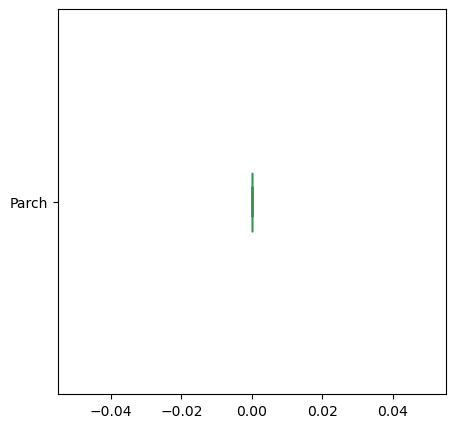

In [197]:
df_titanic['Parch'] = np.where(df_titanic['Parch'] >0, median_sibsp, df_titanic['Parch'])
df_titanic.boxplot(column=['Parch'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

<AxesSubplot:xlabel='Parch', ylabel='Density'>

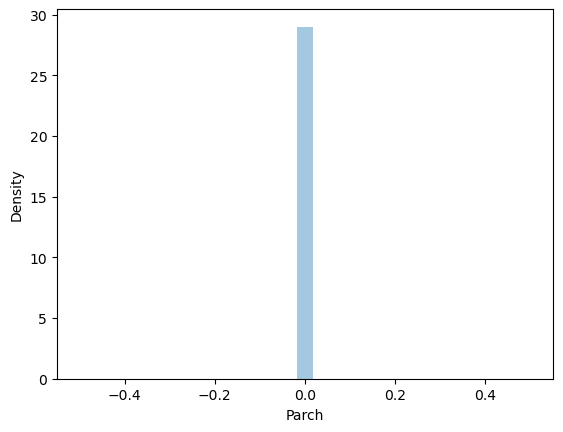

In [198]:
sns.distplot(df_titanic.Parch)

### Fare

<AxesSubplot:>

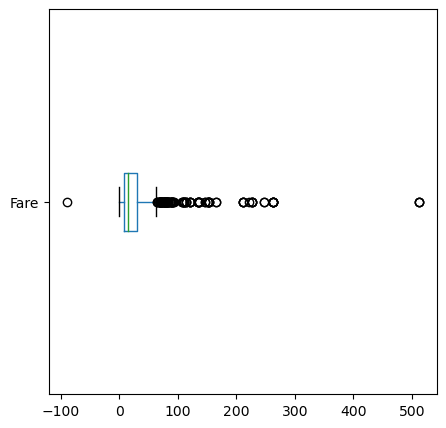

In [199]:
df_titanic.boxplot(column=['Fare'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)


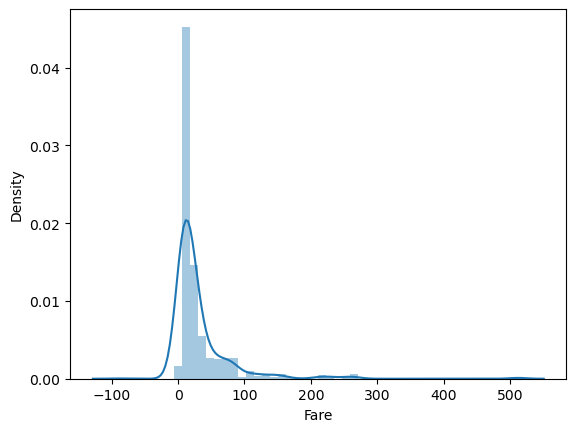

In [200]:
sns.distplot(df_titanic.Fare)
plt.show()

In [201]:
# quartile 1 and 3
Q1 = df_titanic['Fare'].quantile(0.25)
Q3 = df_titanic['Fare'].quantile(0.75)

#IQR
IQR = Q3 - Q1
min_fare = Q1 - 1.5 * IQR
max_fare = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_fare)
print('\nMax:\n',max_fare)

Q1:
 7.9

Q3:
 30.7

IQR:
 22.799999999999997

Min:
 -26.299999999999997

Max:
 64.89999999999999


In [202]:
#another way to detect outliers

outliers = []
def detect_outliers_iqr(data):
    data = sorted(df_titanic['Fare'])
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers  #Driver code
sample_outliers = detect_outliers_iqr(df_titanic['Fare'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [-90.0, 65.0, 65.0, 66.6, 66.6, 69.3, 69.3, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 71.0, 71.0, 71.28, 73.5, 73.5, 73.5, 73.5, 73.5, 75.25, 76.29, 76.73, 76.73, 76.73, 77.29, 77.29, 77.96, 77.96, 77.96, 78.27, 78.27, 78.85, 78.85, 79.2, 79.2, 79.2, 79.2, 79.65, 79.65, 79.65, 80.0, 80.0, 81.86, 82.17, 82.17, 83.16, 83.16, 83.16, 83.48, 83.48, 86.5, 86.5, 86.5, 89.1, 89.1, 90.0, 90.0, 90.0, 90.0, 91.08, 91.08, 93.5, 106.42, 106.42, 108.9, 108.9, 110.88, 110.88, 110.88, 110.88, 113.28, 113.28, 113.28, 120.0, 120.0, 120.0, 120.0, 133.65, 133.65, 134.5, 134.5, 135.63, 135.63, 135.63, 146.52, 146.52, 151.55, 151.55, 151.55, 151.55, 153.46, 153.46, 153.46, 164.87, 164.87, 211.34, 211.34, 211.34, 211.5, 221.78, 227.52, 227.52, 227.52, 227.52, 247.52, 247.52, 262.38, 262.38, 263.0, 263.0, 263.0, 263.0, 512.33, 512.33, 512.33]


There are some outliers, we also will handle this column with median values.

<AxesSubplot:>

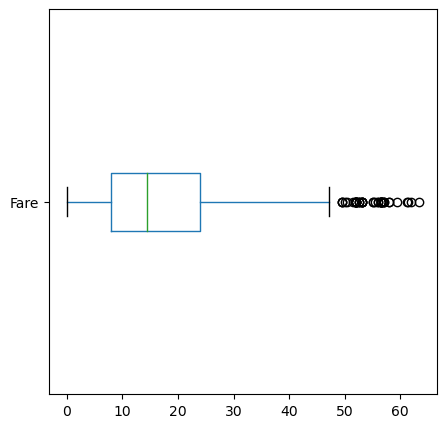

In [203]:
median_fare = float(df_titanic['Fare'].median())

df_titanic['Fare'] = np.where(df_titanic['Fare'] <-26, median_fare, df_titanic['Fare'])
df_titanic['Fare'] = np.where(df_titanic['Fare'] >64.8, median_fare, df_titanic['Fare'])
df_titanic.boxplot(column=['Fare'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

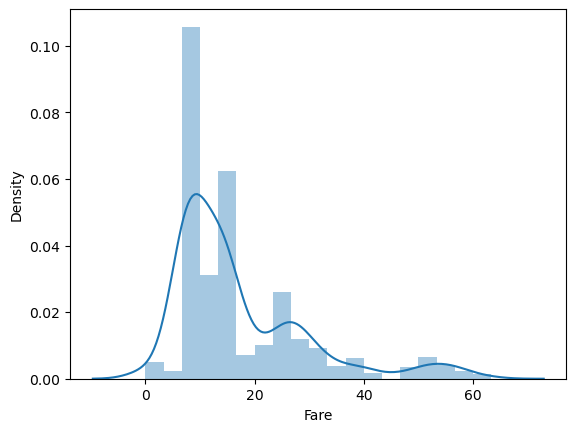

In [204]:
sns.distplot(df_titanic.Fare)

#### do one more checking for the null values

In [205]:
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
FirstName      0
LastName       0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Ship           0
dtype: int64

### Normalization

In [206]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.0,888.000000
mean,0.382883,2.309685,28.456081,0.297297,0.0,17.206791
std,0.486364,0.834594,9.796480,0.521806,0.0,12.465003
min,0.000000,1.000000,3.000000,0.000000,0.0,0.000000
25%,0.000000,2.000000,23.750000,0.000000,0.0,7.915000
50%,0.000000,3.000000,28.000000,0.000000,0.0,14.450000
75%,1.000000,3.000000,33.000000,1.000000,0.0,24.000000
max,1.000000,3.000000,54.000000,2.000000,0.0,63.360000


In [207]:
df_scaled = df_titanic[["Survived","Pclass","Age","SibSp","Parch","Fare"]]

In [208]:

# apply normalization techniques
for column in df_scaled.columns:
    df_scaled[column] = (df_scaled[column] - df_scaled[column].min()) / (df_scaled[column].max() - df_scaled[column].min())    
  
# view normalized data
df_scaled

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.372549,0.5,NaN,0.114426
1,1.0,0.0,0.686275,0.5,NaN,0.228062
2,1.0,1.0,0.450980,0.0,NaN,0.125000
3,1.0,0.0,0.627451,0.5,NaN,0.838068
4,0.0,1.0,0.627451,0.0,NaN,0.127052
...,...,...,...,...,...,...
887,1.0,0.0,0.313725,0.0,NaN,0.473485
888,0.0,1.0,0.490196,0.5,NaN,0.370107
889,1.0,0.0,0.450980,0.0,NaN,0.473485
890,0.0,1.0,0.568627,0.0,NaN,0.122317


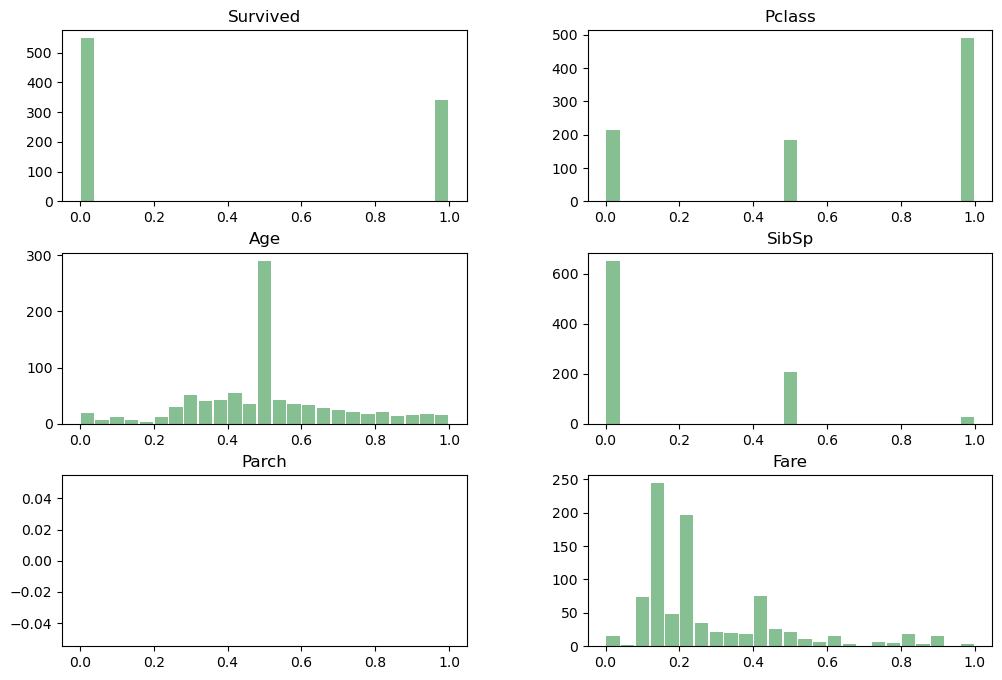

In [209]:
df_scaled.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

In [210]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    object 
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   FirstName    888 non-null    object 
 4   LastName     888 non-null    object 
 5   Sex          888 non-null    object 
 6   Age          888 non-null    float64
 7   SibSp        888 non-null    float64
 8   Parch        888 non-null    float64
 9   Ticket       888 non-null    object 
 10  Fare         888 non-null    float64
 11  Cabin        888 non-null    object 
 12  Embarked     888 non-null    object 
 13  Ship         888 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 104.1+ KB


In [211]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.0,888.000000
mean,0.382883,2.309685,28.456081,0.297297,0.0,17.206791
std,0.486364,0.834594,9.796480,0.521806,0.0,12.465003
min,0.000000,1.000000,3.000000,0.000000,0.0,0.000000
25%,0.000000,2.000000,23.750000,0.000000,0.0,7.915000
50%,0.000000,3.000000,28.000000,0.000000,0.0,14.450000
75%,1.000000,3.000000,33.000000,1.000000,0.0,24.000000
max,1.000000,3.000000,54.000000,2.000000,0.0,63.360000


In [212]:
# saving the dataframe
df_titanic.to_csv('titanic_clean.csv')